In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from scipy.stats import expon, kstest, rv_discrete

from src.code.models.galton_watson import GaltonWatson
from src.utils.utils import init_notebook
from src.config.config import seed

In [2]:
init_notebook(seed)

# Simulation Galton-Watson

## Loi de Poisson

### λ = 1

Soit $L$ la loi de reproduction.

Nous avons $L \sim {\mathrm {Poisson}}(1)$.

In [3]:
poisson_1 = stats.poisson(1)

In [4]:
gp1 = GaltonWatson(poisson_1)
gp1

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

In [5]:
nb_survivants = gp1.simule(20)

In [6]:
print(f"Il reste {nb_survivants} survivants au bout de {gp1.n} époques.")

Il reste 0 survivants au bout de 10 époques.


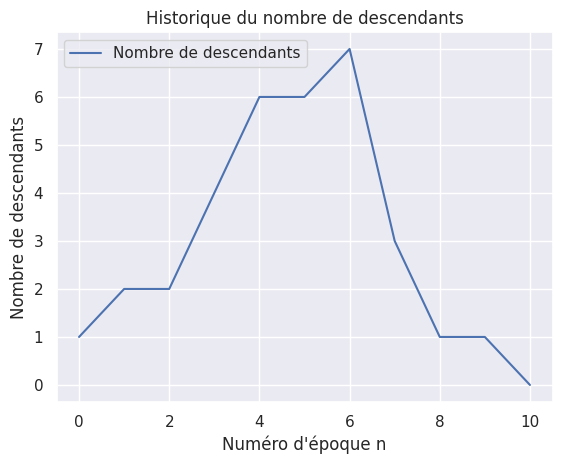

In [7]:
gp1.plot_historique_descendants()

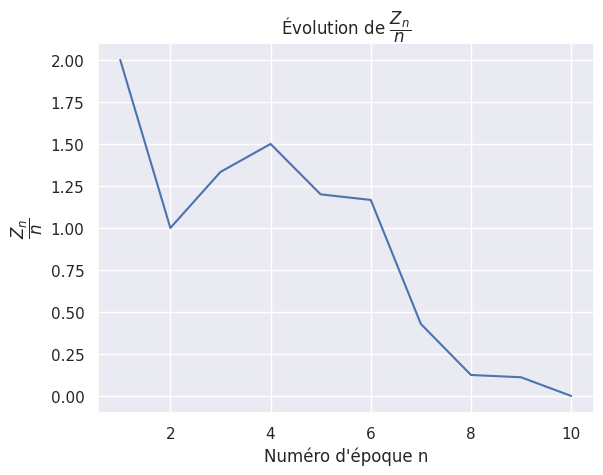

In [8]:
gp1.plot_zn_sur_n()

#### Arbre de Galton-Watson

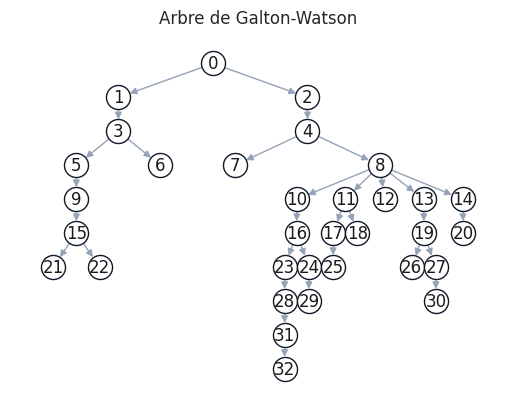

In [27]:
gp1.plot_arbre()

### λ = 2

In [9]:
poisson_2 = stats.poisson(2)

In [10]:
gp2 = GaltonWatson(poisson_2)
gp2

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 2.0
- époque n = 0
- nombre de survivants Z_n = 1

In [11]:
nb_survivants = gp2.simule(20)

In [12]:
print(f"Il reste {nb_survivants} survivants au bout de {gp1.n} époques.")

Il reste 680149 survivants au bout de 10 époques.


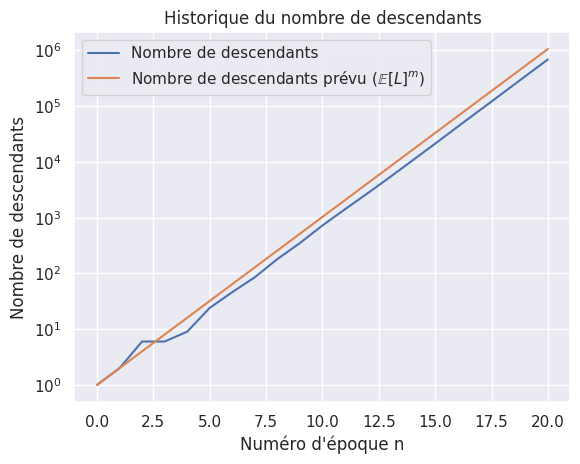

In [13]:
gp2.plot_historique_descendants(logscale=True, affiche_moyenne=True)

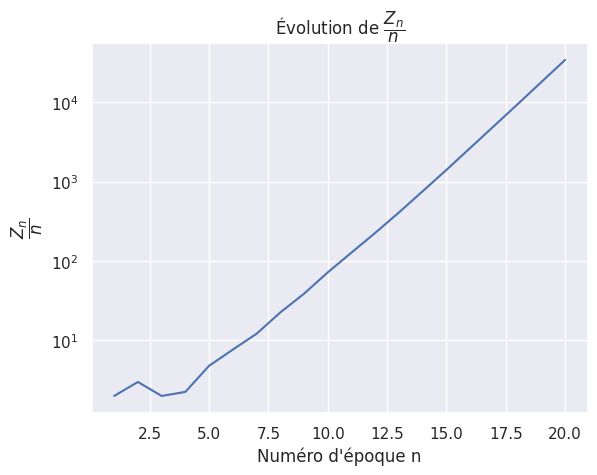

In [14]:
gp2.plot_zn_sur_n(logscale=True)

## Essais $Z_n / n$

In [15]:
simu = []

nb_simulations = 10_000
nb_epoques = 100

gwp1 = GaltonWatson(poisson_1)

for i in range(nb_simulations):
    gwp1.reset()
    resultat = gwp1.simule(nb_epoques)
    simu.append(resultat)

In [16]:
simu_poisson1 = np.array(simu)

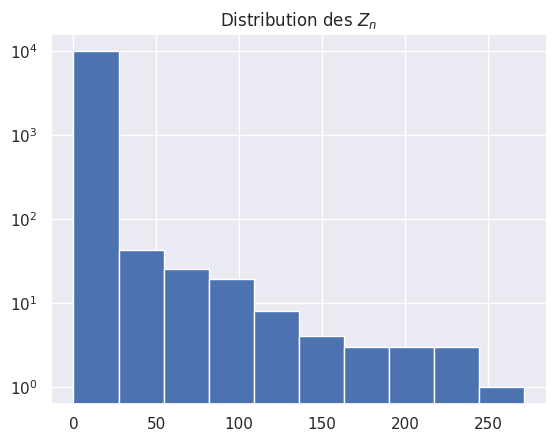

In [17]:
plt.title("Distribution des $Z_n$")
plt.hist(simu_poisson1)
plt.yscale("log")

In [18]:
np.sum(simu_poisson1 > 0)

191

In [19]:
zn_sup_zero = simu_poisson1[simu_poisson1 > 0]

(array([83., 43., 26., 17.,  8.,  4.,  3.,  3.,  3.,  1.]),
 array([  1. ,  28.1,  55.2,  82.3, 109.4, 136.5, 163.6, 190.7, 217.8,
        244.9, 272. ]),
 <BarContainer object of 10 artists>)

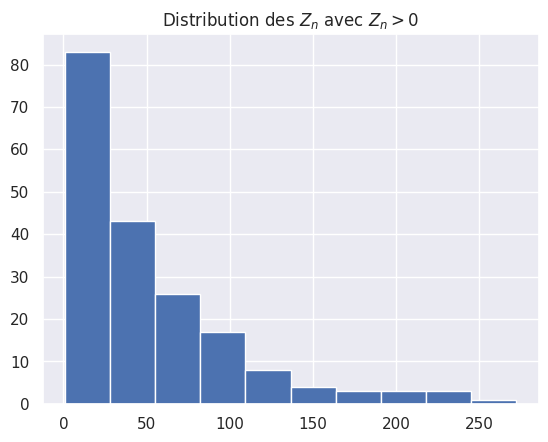

In [20]:
plt.title("Distribution des $Z_n$ avec $Z_n > 0$")
plt.hist(zn_sup_zero)

In [21]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 1.902959051509415


In [22]:
loi_expo1 = stats.expon(scale=1 / lambda_estime)

In [23]:
echantillon_expo = loi_expo1.rvs(size=len(zn_sup_zero))

(array([83., 55., 22., 12.,  9.,  5.,  1.,  2.,  1.,  1.]),
 array([1.24462920e-03, 3.03437151e-01, 6.05629673e-01, 9.07822196e-01,
        1.21001472e+00, 1.51220724e+00, 1.81439976e+00, 2.11659228e+00,
        2.41878481e+00, 2.72097733e+00, 3.02316985e+00]),
 <BarContainer object of 10 artists>)

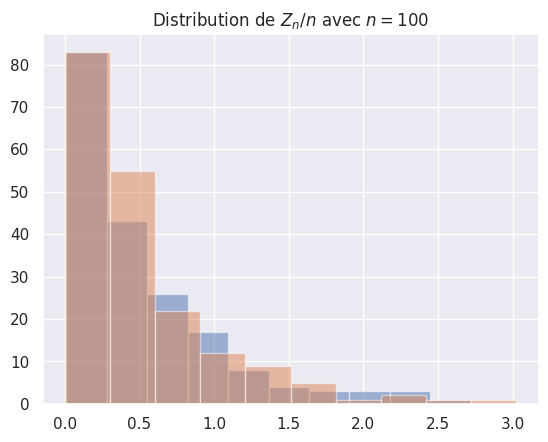

In [24]:
plt.title(f"Distribution de $Z_{{n}} / n$ avec $n = 100$")
plt.hist(zn_sup_zero / nb_epoques, alpha=0.5)
plt.hist(echantillon_expo, alpha=0.5)

<Axes: title={'center': 'Distribution de $Z_{n} / n$ avec $n = 100$'}, ylabel='Probability'>

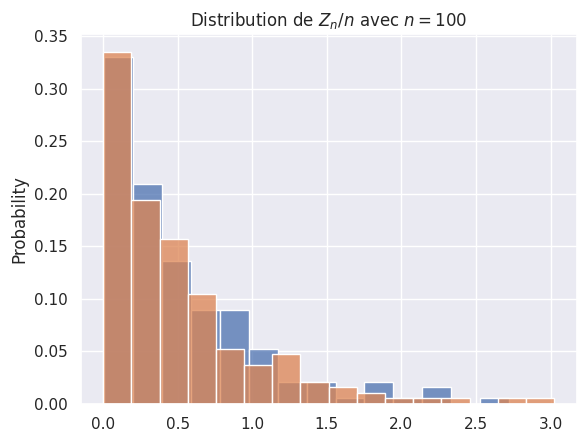

In [25]:
plt.title(f"Distribution de $Z_{{n}} / n$ avec $n = 100$")
sns.histplot(zn_sup_zero / nb_epoques, stat="probability")
sns.histplot(echantillon_expo, stat="probability")

In [26]:
# Exemple de données
donnees = zn_sup_zero / nb_epoques

# Paramètre lambda estimé (par exemple, à partir de la méthode du maximum de vraisemblance)
lambda_estime = 1.0 / np.mean(donnees)
print(f"{lambda_estime = }")

# Effectuer le test de Kolmogorov-Smirnov
statistique_ks, p_value = kstest(donnees, "expon", args=(0, 1 / lambda_estime))

# Afficher les résultats
print("Statistique KS:", statistique_ks)
print("P-value:", p_value)

# Interprétation du résultat
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Les données ne suivent pas une loi exponentielle.")
else:
    print("Les données suivent une loi exponentielle.")

lambda_estime = 1.902959051509415
Statistique KS: 0.057586680541798524
P-value: 0.531818713902256
Les données suivent une loi exponentielle.
